
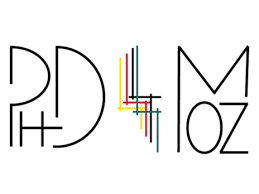
[PhD4Moz](https://icvs.uminho.pt/project/phd4moz/)


Nuno S. Osório (nosorio@med.uminho.pt)

Data: 16 de maio 2024

Versão Interativa: https://tinyurl.com/phd4moz-nso

# 🌍 Introdução à base de dados do MalariaGEN

## Bem-vindo a esta sessão de introdução à base de dados MalariaGEN! Hoje, vamos concentrar-nos no [Plasmodium falciparum versão 7 (Pf7)](https://www.malariagen.net/resource/34). Esta base de dados inclui metadados de amostras e informações sobre polimorfismos de nucleótido único (SNP). Esta versão abrange vários projectos [MalariaGEN](https://www.malariagen.net/), incluindo [Pf community project](https://www.malariagen.net/parasite/p-falciparum-community-project), [GenRe-Mekong](https://www.malariagen.net/parasite/genre-mekong) e [SpotMalaria](https://www.malariagen.net/parasite/spotmalaria), e uma colaboração entre 82 estudos espalhados por todo o mundo.

## Nesta aula vamos aceder aos dados do Pf7 diretamente da nuvem, vamos usar a linguagem python para explorar os dados e vamos executar as análise no Google Colab.

## Aqui está uma visão geral sobre a distribuição espacial e geográfica das amostras disponíveis no Pf7, obtida a partir da [página web do projeto](https://www.malariagen.net/apps/pf7/).

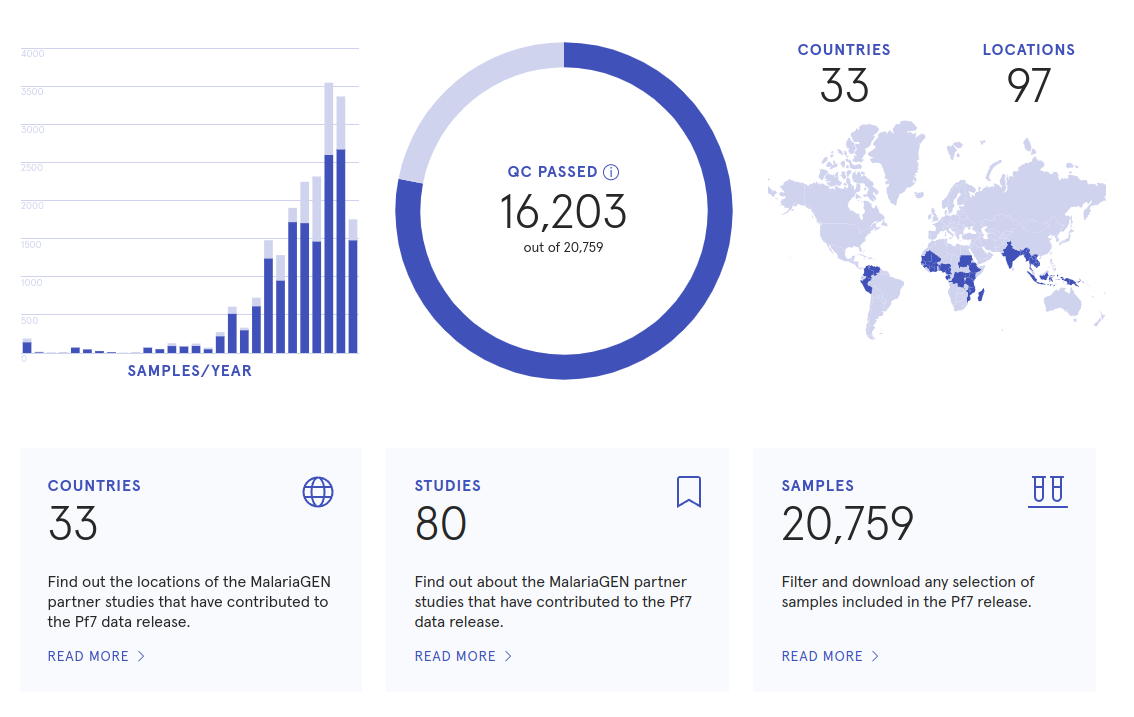

# 🐍 Vantagens do Python na Bioinformática



## Python é uma linguagem de programação poderosa e flexível que é excelente para a análise de dados. Aqui estão algumas das suas vantagens quando aplicado à bioinformática:

1. **Código aberto**: Python é de código aberto, o que significa que é gratuito para usar. Além disso, tem uma grande e ativa comunidade de usuários que podem ajudar a responder perguntas e resolver problemas. 👥

2. **Bibliotecas úteis**: Python tem uma série de módulos, como pandas e NumPy, que fornecem estruturas de dados de alto nível e ferramentas de análise de dados. Isso facilita a manipulação e análise de grandes conjuntos de dados biológicos. Por exemplo, hoje vamos usar vários destes programas que estão disponíveis como o módulo `malariagen_data` que facilita o acesso aos dados do MalariaGEN. 📚

3. **Reprodutibilidade**: Uma das maiores vantagens de usar código e linguagens de programação como o Python na bioinformática é a reprodutibilidade. Quando se utiliza um programa com interface gráfica, é mais difícil descrever aos outros exatamente como se fez as análises. O código pode ser escrito e compartilhado, permitindo que outros reproduzam as análises e obtenham os mesmos resultados. 🔁

4. **Eficiência**: Python permite realizar análises de dados de forma eficiente. Com Python, você pode processar grandes volumes de dados de forma rápida e eficaz, o que é essencial na bioinformática onde os conjuntos de dados podem ser muito grandes. 🚀

## Em resumo, Python e outras linguagens de programação como o R são ferramentas incrivelmente úteis para a bioinformática, tornando a análise de dados biológicos mais acessível e eficiente. 📊


#  ☁️ Serviços de Computação na Rede


## Os serviços de computação na rede/nuvem oferecem uma série de vantagens significativas para a bioinformática. Exemplos desses serviços incluem o Google Colab ou o MyBinder. Hoje vamos utilizar o Google Colab que permite correr código em Python ou em R. 🌐

* **Google Colab**: O Google Colab é um serviço de computação interativo que pode ser utilizado de forma gratuíta para fins educativos ou de investigação. Necessita de uma conta no google. Ele fornece um ambiente computacional que na versão gratuíta oferece cerca de **12 GB de RAM** e **100 GB de espaço em disco** 💾.

* **Benefícios**: Um dos maiores benefícios do uso de serviços de nuvem como o Google Colab é que não são necessários processos de instalação do sistema operativo ou da liguagem de programação. Para começar a correr código Python basta abrir este notebook na versão interativa e carregar play 🚀

## Em resumo, os serviços de nuvem, como o Google Colab, oferecem uma plataforma  acessível para a realização de investigações em bioinformática, sem a necessidade de instalação ou configuração complexa. Os recursos dispobilizados gratuitamente podem ser suficientes para alguns projetos sendo muito úteis em contextos em que os recursos computacionais possam ser limitados 👩‍🔬.

In [ ]:
# Teste
import sys

print(f"Olá PhD4Moz! Estamos a usar o python na versão {sys.version}")


# 🖥️ Objectos de dados eficientes e módulos para os trabalhar

🧱 Os dados em bioinformática e noutras áreas da computação e ciência de dados são tipicamente organizados de forma eficiente em objecticos como **vetores**, **matrizes**, **arrays**, **dataframes**, **listas**:

- **Vetores**: É uma conjunto unidimensional de elementos do mesmo tipo.
- **Matrizes**: É uma conjunto bidimensional (contém linhas e colunas) de elementos do mesmo tipo.
- **Array**: É uma coleção de qualquer número de dimensões. Por exemplo uma coleção de matrizes. Cada dimensão em um array é um eixo.
- **Dataframe**: É um conjunto bidimensional (contém linhas e colunas) de elementos de tipos diferentes.
- **Lista**: É uma coleção de elementos que podem ser de diferentes tipos.

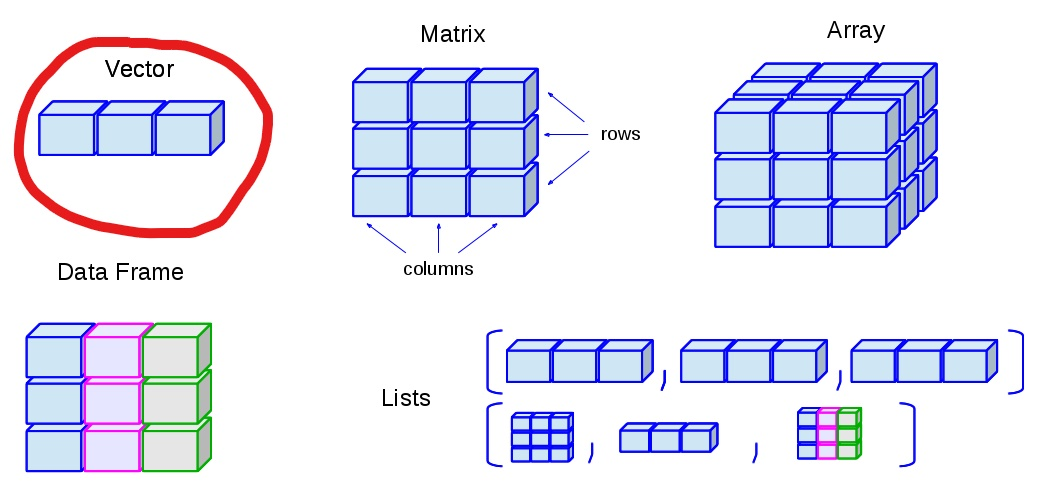

(fonte: https://thiyangt.github.io/rworkbook/)

* **Dask**: O Dask é uma biblioteca Python para computação paralela e distribuída que se integra perfeitamente com o ecossistema Python. O Dask é
especialmente útil para a manipulação de conjuntos de dados de grandes dimensões, pois permite trabalhar com arrays maiores do que a memória. Isso é especialmente em vários trabalhos de bioinformática incluíndo o acesso e manipulação de fontes de informação como o MalariaGEN Pf7.

* **Numpy**: O Numpy é uma biblioteca fundacional para a computação científica em Python. Fornece suporte para matrizes e arrays, juntamente com uma grande coleção de funções matemáticas para operar nesses objetos. Além disso, o Numpy oferece ferramentas de computação numérica abrangentes, incluindo geradores de números aleatórios, rotinas de álgebra linear, e muito mais.

* **Allel**: O Allel, também conhecido como scikit-allel, é um pacote Python para análise exploratória de dados de variação genética em grande escala. É baseado em numpy e outras bibliotecas científicas Python de uso geral. O Allel fornece uma variedade de funcionalidades para trabalhar com dados genéticos como estruturas de dados para trabalhar com genótipos, variantes, arrays de contagem de alelos e muito mais. Além disso, o Allel fornece uma série de funções estatísticas para calcular medidas comuns em genética populacional.


# 📚 Acesso à Pf7 usando Python

In [ ]:
!pip install -q --no-warn-conflicts malariagen_data
import numpy as np
import dask
import dask.array as da
from dask.diagnostics.progress import ProgressBar
import allel
# silence some warnings
# dask.config.set(**{'array.slicing.split_large_chunks': False})
import malariagen_data


## 🌍 Focusing on MozambiqueLet's focus our analysis on samples from Mozambique 🇲🇿